In [10]:
#Step 1 - Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [16]:
#Step 2 - Load the training data
train = pd.read_csv("C:\\CJ\\SkillCraft Intership\\Task 1 - House Price\\train.csv")
train[['GrLivArea','BedroomAbvGr','FullBath','SalePrice']].head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [34]:
#Step 3 - Select features and target
X = train[['GrLivArea','BedroomAbvGr','FullBath']]
y = train['SalePrice']

In [36]:
#Step 4 - Handle Missing Values
X.isnull().sum()
X = X.fillna(X.mean())

In [38]:
#Step 5 - Train-test split
X_train, X_test , y_train , y_test = train_test_split (X,y, test_size = 0.2 , random_state = 42)

In [40]:
#Step 6 - Train the linear regession model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
#Step 7 - Predict house prices
y_pred = model.predict(X_test)

In [44]:
#Step 8 - Evaluate the model
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 2806426667.247852
R2 Score: 0.6341189942328374


In [46]:
#Step 9 - Interpret Conditions
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)
print("Intercept:", model.intercept_)

        Feature   Coefficient
0     GrLivArea    104.026307
1  BedroomAbvGr -26655.165357
2      FullBath  30014.324109
Intercept: 52261.74862694451


In [48]:
#Step 10 - Predict price of new house
new_house = [[2000, 3, 2]]
predicted_price = model.predict(new_house)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 240377.51479736285


C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
#Step 11 - Using test.csv for predicting future house prices
test = pd.read_csv("C:\\CJ\\SkillCraft Intership\\Task 1 - House Price\\test.csv")
X_final = test[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
X_final = X_final.fillna(X_final.mean())
final_predictions = model.predict(X_final)

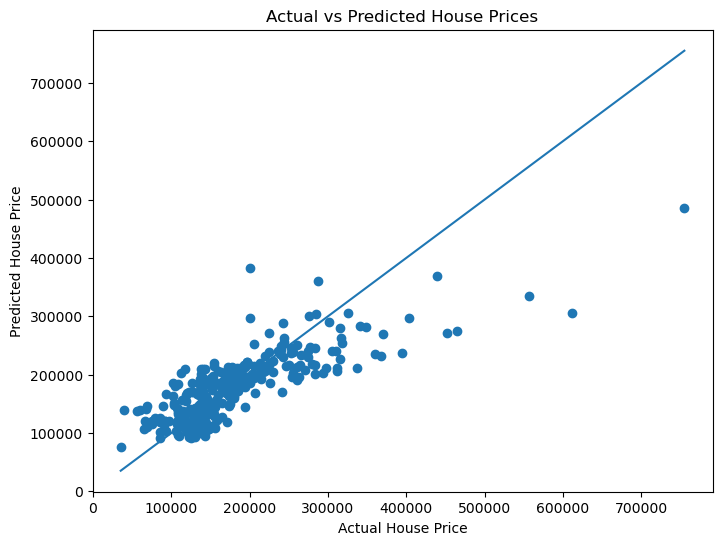

In [58]:
#Step 12 - Plot for Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.savefig("C:\\CJ\\SkillCraft Intership\\Task 1 - House Price\\actualvspredicted.png")
plt.show()